In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import seaborn as sns

In [198]:
# Specify the path to your Excel file
file_path = "/Users/gengruisi/Downloads/data.xlsx"
# Load the data from the Excel file
df = pd.read_excel(file_path)

## EDA

In [209]:
df.describe

<bound method NDFrame.describe of             INDEX   LOAN_MTH  LOAN_AMT_PERIOD  AGE  PRODUCT_MAX_DLQ_DAYS  \
LOAN_DATE                                                                  
2023-02-01      1 2023-02-01               12   31                     1   
2023-02-01   1871 2023-02-01                6   27                     2   
2023-02-01   7041 2023-02-01               12   41                     1   
2023-02-01    920 2023-02-01                6   35                     1   
2023-02-01   2607 2023-02-01               12   41                     3   
...           ...        ...              ...  ...                   ...   
2023-03-31  13023 2023-03-01               12   35                     1   
2023-03-31  13024 2023-03-01               12   27                     1   
2023-03-31  13062 2023-03-01                9   24                     1   
2023-03-31  12164 2023-03-01                6   22                     1   
2023-03-31  20000 2023-03-01               12   32    

In [200]:
# Perform EDA on selected columns
selected_columns = ['AGE', 'PRODUCT_MAX_DLQ_DAYS_3M', 'EDUCATION', 'IF_RURAL', 'MARRIAGE', 'SEX']
eda_data = df[selected_columns]

# Summary statistics for numerical columns
summary_stats = eda_data.describe()

# Counts for categorical columns
education_counts = eda_data['EDUCATION'].value_counts()
if_rural_counts = eda_data['IF_RURAL'].value_counts()
marriage_counts = eda_data['MARRIAGE'].value_counts()
sex_counts = eda_data['SEX'].value_counts()

# Display the EDA results
(summary_stats, education_counts, if_rural_counts, marriage_counts, sex_counts)

(                AGE  PRODUCT_MAX_DLQ_DAYS_3M
 count  20000.000000             20000.000000
 mean      36.029300                 0.592450
 std        8.010428                 0.781718
 min       22.000000                 0.000000
 25%       30.000000                 0.000000
 50%       35.000000                 0.000000
 75%       42.000000                 1.000000
 max       56.000000                11.000000,
 EDUCATION
 大专       5938
 高中       4639
 本科       4500
 其他       2410
 中专       1618
 初中        610
 硕士及以上     252
 小学         28
 技校          5
 Name: count, dtype: int64,
 IF_RURAL
 是     10331
 否      9435
 -1      234
 Name: count, dtype: int64,
 MARRIAGE
 已婚    11598
 未婚     6585
 未知      991
 离婚      810
 丧偶       16
 Name: count, dtype: int64,
 SEX
 男    13430
 女     6570
 Name: count, dtype: int64)

/var/folders/y6/sbbqbw5d3pv2xrm40hxkbzjh0000gn/T/ipykernel_1767/3644943394.py:24: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  plt.tight_layout()
/var/folders/y6/sbbqbw5d3pv2xrm40hxkbzjh0000gn/T/ipykernel_1767/3644943394.py:24: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  plt.tight_layout()
/var/folders/y6/sbbqbw5d3pv2xrm40hxkbzjh0000gn/T/ipykernel_1767/3644943394.py:24: UserWarning: Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from current font.
  plt.tight_layout()
/var/folders/y6/sbbqbw5d3pv2xrm40hxkbzjh0000gn/T/ipykernel_1767/3644943394.py:24: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from current font.
  plt.tight_layout()
/var/folders/y6/sbbqbw5d3pv2xrm40hxkbzjh0000gn/T/ipykernel_1767/3644943394.py:24: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.tight_layout()
/var/folders/y6/sbbqbw5d3pv2xrm40hxkbzjh0000gn/T/ipykernel_1

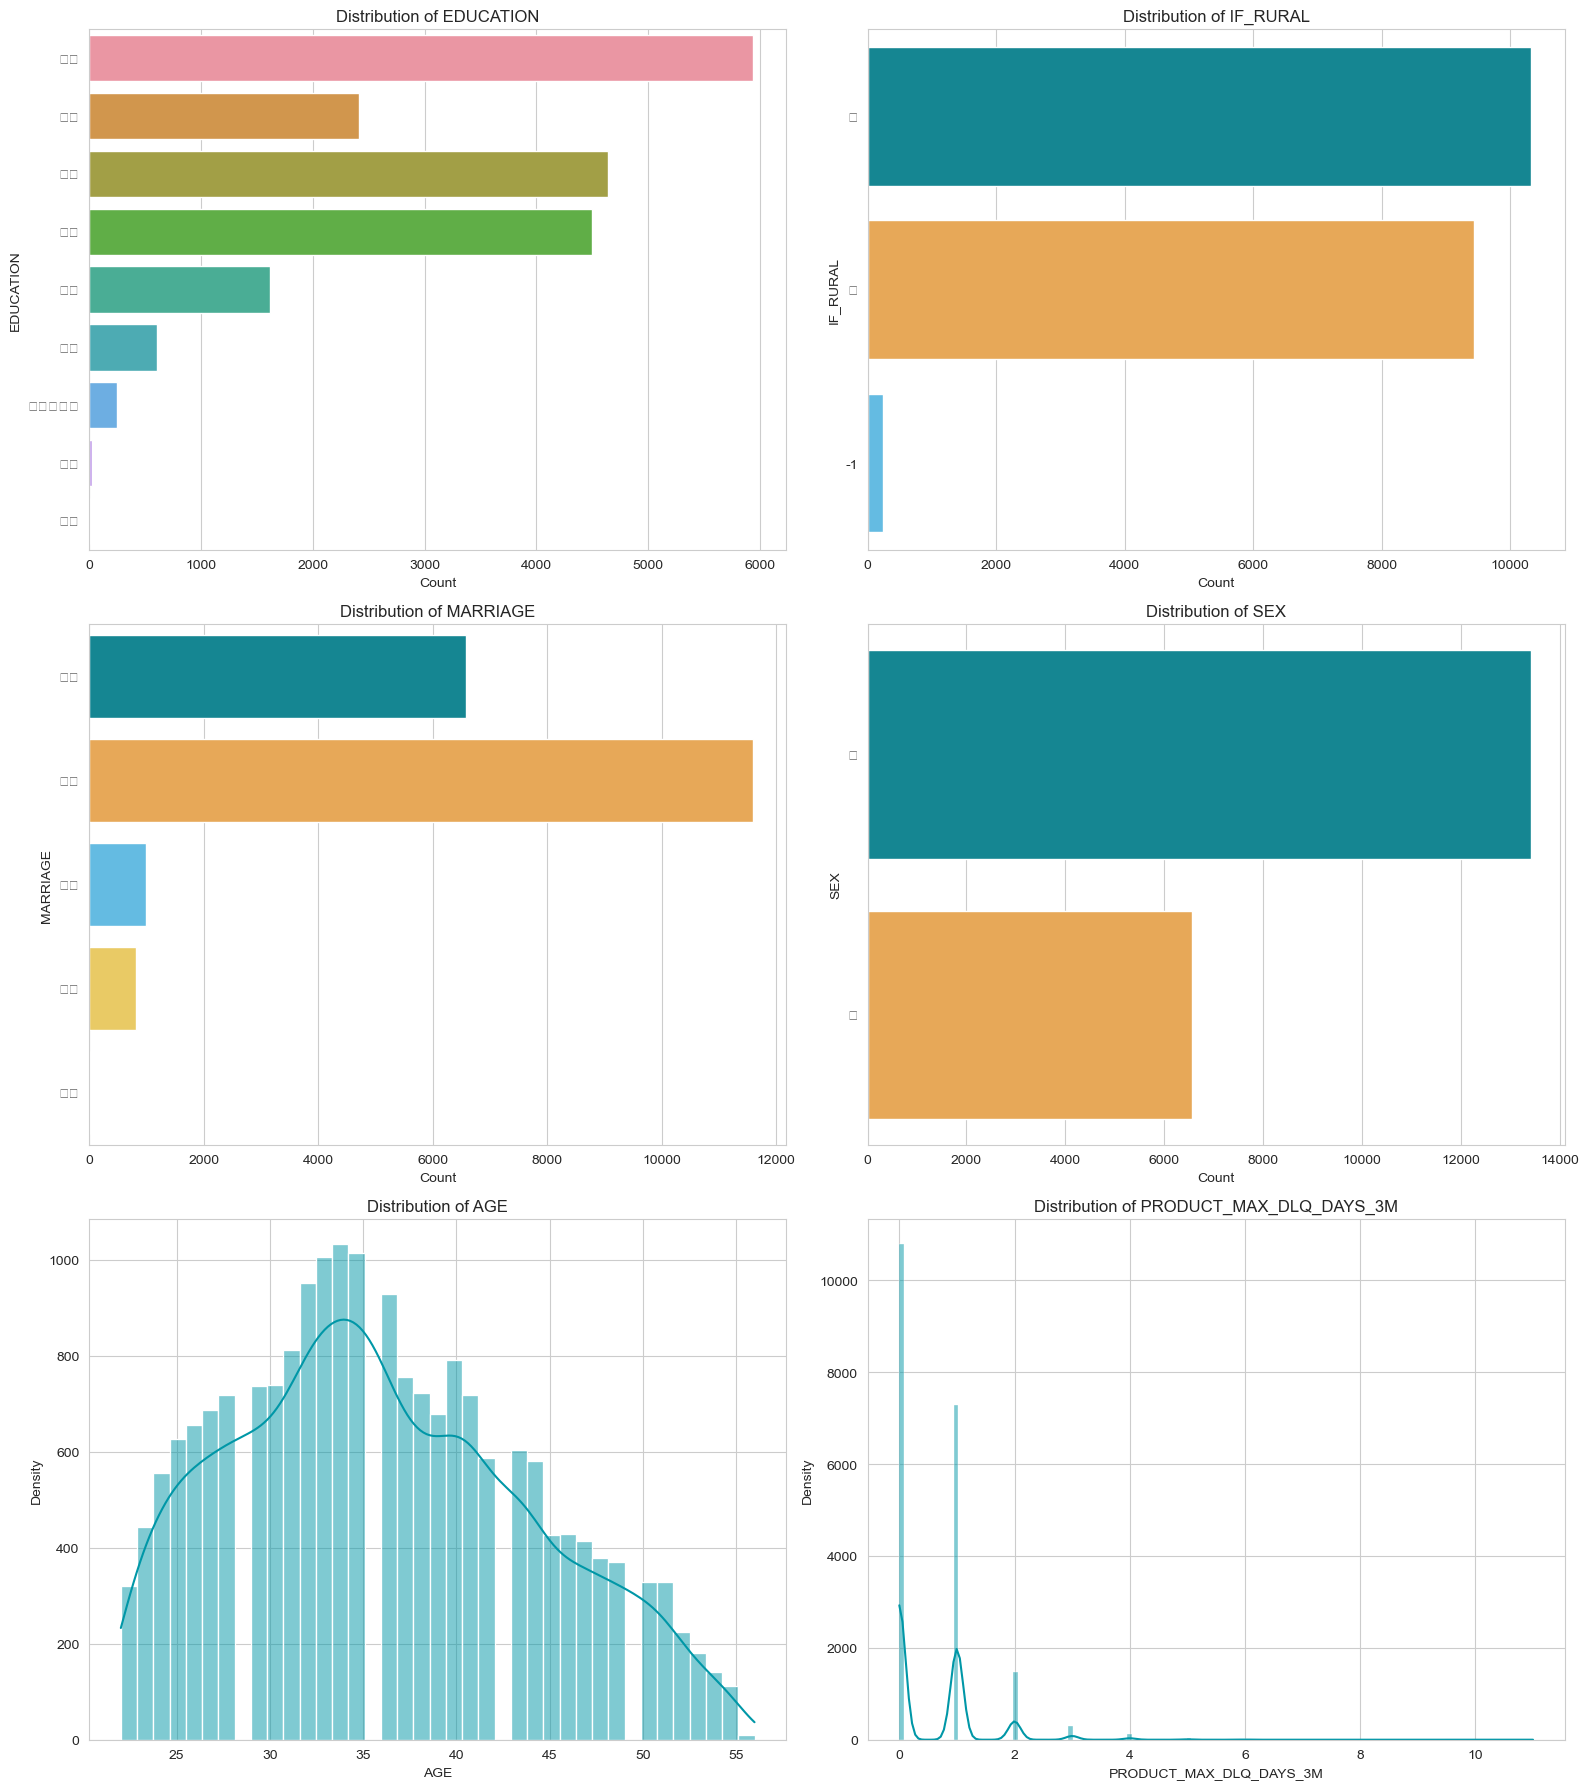

In [201]:
# Setting the color palette to the specified theme colors
theme_colors = ['#0097a7', '#ffab40']

# Extend the theme colors with additional colors for variety in the plots
extended_theme_colors = theme_colors + ['#4fc3f7', '#ffd54f', '#ffb74d', '#ff8a65']

# Set the color palette in seaborn
sns.set_palette(extended_theme_colors)

# Re-create the figure with subplots for all six distributions
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot the distributions of categorical variables with English labels and updated colors
plot_count_distribution(eda_data, 'EDUCATION', axes[0, 0])
plot_count_distribution(eda_data, 'IF_RURAL', axes[0, 1])
plot_count_distribution(eda_data, 'MARRIAGE', axes[1, 0])
plot_count_distribution(eda_data, 'SEX', axes[1, 1])

# Plot the distributions of numerical variables with updated colors
plot_numerical_distribution(eda_data, 'AGE', axes[2, 0])
plot_numerical_distribution(eda_data, 'PRODUCT_MAX_DLQ_DAYS_3M', axes[2, 1])

# Adjust the layout
plt.tight_layout()
plt.show()


In [202]:
# Check for statistical significance in the trend of M2+ rates over time.
# use OLS for the trend analysis
m2_rate_monthly = df.groupby(df.index)['M2_FLG'].mean()
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(m2_rate_monthly)), m2_rate_monthly)

# Now let's explore potential factors influencing the M2+ delinquency by examining correlations with other variables.
selected_columns = ['AGE', 'PRODUCT_MAX_DLQ_DAYS', 'PRODUCT_MAX_DLQ_DAYS_3M', 'PRODUCT_MAX_DLQ_DAYS_12M',
                    'EXT1_INCOME_FORECAST', 'EXT2_D7_NBANK_ORGNUM', 'EXT2_M1_NBANK_ORGNUM', 'EXT2_M3_NBANK_ORGNUM']

# Calculate correlations
correlations = df[selected_columns + ['M2_FLG']].corr()['M2_FLG'].sort_values(ascending=False)

# Display the results
slope, intercept, r_value, p_value, std_err, correlations

(5.505375013763437e-07,
 0.02259490025498725,
 0.01923367744715567,
 0.006525539978085277,
 2.0237224606647692e-07,
 M2_FLG                      1.000000
 AGE                         0.007952
 EXT2_D7_NBANK_ORGNUM        0.006266
 PRODUCT_MAX_DLQ_DAYS_12M    0.004775
 PRODUCT_MAX_DLQ_DAYS_3M     0.003887
 EXT2_M1_NBANK_ORGNUM        0.000563
 PRODUCT_MAX_DLQ_DAYS       -0.001578
 EXT2_M3_NBANK_ORGNUM       -0.013324
 EXT1_INCOME_FORECAST       -0.025443
 Name: M2_FLG, dtype: float64)

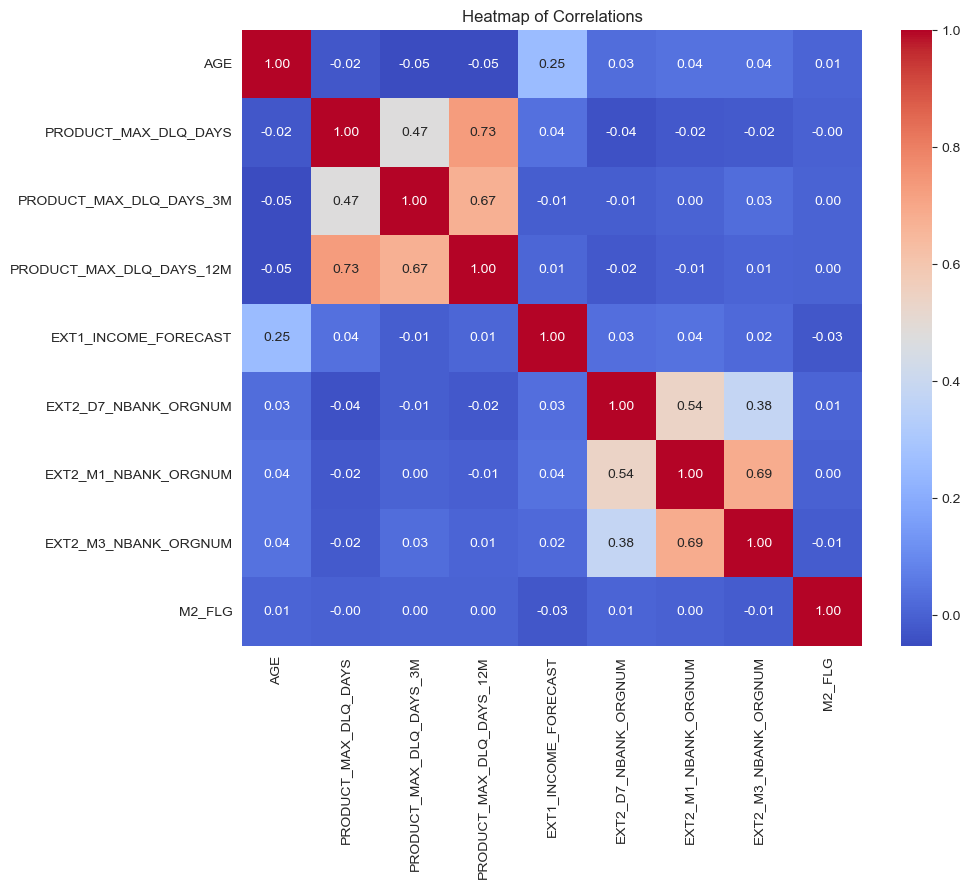

In [203]:
# Using the previously defined 'data' DataFrame for correlation calculation
correlations_matrix = df[selected_columns + ['M2_FLG']].corr()

# Use Seaborn to create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()

### Daily M2+ Rates Plot

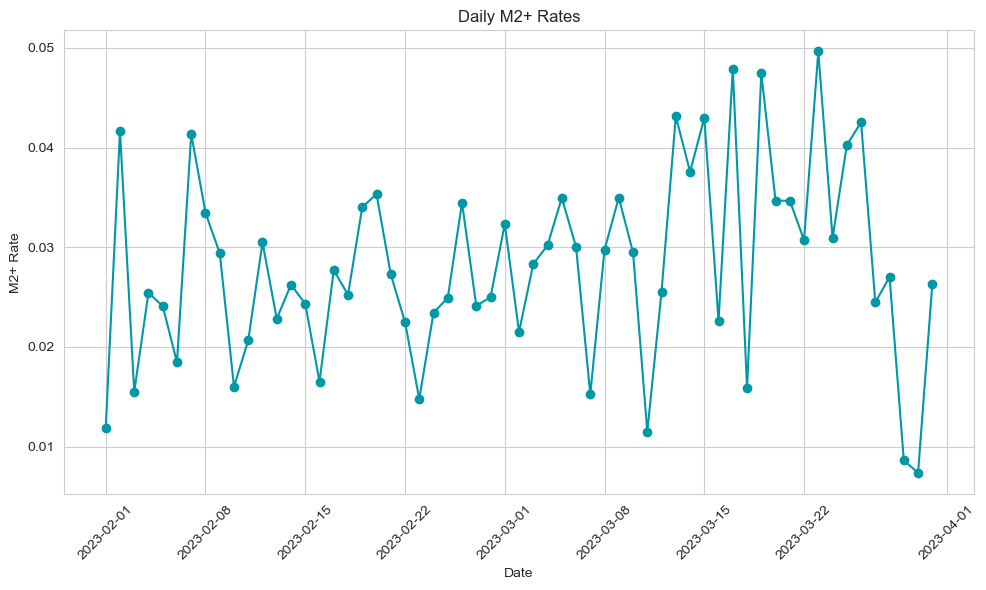

In [204]:
#将 'LOAN_DATE' 列的数据类型转换为 datetime，并且只保留日期部分
df['LOAN_DATE'] = pd.to_datetime(df['LOAN_DATE']).dt.date

#将 'LOAN_DATE' 设置为索引，以便进行按日分析
df.set_index('LOAN_DATE', inplace=True)

#根据新的索引（LOAN_DATE）对 DataFrame 进行排序
df.sort_index(inplace=True)
df.sort_index(inplace=True)

# 计算每日的 M2+率
m2_rate_daily = df.groupby(df.index)['M2_FLG'].mean()

# Plotting the M2+ rates by day
plt.figure(figsize=(10, 6))
m2_rate_daily.plot(kind='line', marker='o')
plt.title('Daily M2+ Rates')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  

# Show the plot
plt.show()

In [205]:
# First, we need to group the data by date to calculate daily M2+ rates
daily_data = df.groupby(df.index)['M2_FLG'].agg(['sum', 'count']).reset_index()

# Calculate the daily M2+ rate
daily_data['M2_rate'] = daily_data['sum'] / daily_data['count']

# Now, let's compute the mean and standard deviation of the daily M2+ rate
mean_m2_rate = daily_data['M2_rate'].mean()
std_m2_rate = daily_data['M2_rate'].std()

# Displaying the computed mean and standard deviation
mean_m2_rate, std_m2_rate

(0.02806863327583174, 0.00979581529489246)

### Control Chart for Daily M2+ Rates

In [206]:
# Calculate the upper and lower control limits (UCL, LCL) for the M2+ rate
UCL = mean_m2_rate + 1.5 * std_m2_rate
LCL = mean_m2_rate - 1.5 * std_m2_rate

# Add control limits to the dataframe for plotting
daily_data['UCL'] = UCL
daily_data['LCL'] = LCL
daily_data['Mean'] = mean_m2_rate

# Identify days where M2+ rate is outside the control limits
outliers = daily_data[(daily_data['M2_rate'] > UCL) | (daily_data['M2_rate'] < LCL)]

# Number of days that are outside of the control limits
num_outliers = outliers.shape[0]

# Displaying the upper and lower control limits and the number of outlier days
UCL, LCL, num_outliers, outliers[['LOAN_DATE', 'M2_rate']]

(0.04276235621817043,
 0.013374910333493048,
 9,
      LOAN_DATE   M2_rate
 0   2023-02-01  0.011905
 38  2023-03-11  0.011494
 40  2023-03-13  0.043147
 42  2023-03-15  0.042980
 44  2023-03-17  0.047887
 46  2023-03-19  0.047458
 50  2023-03-23  0.049645
 56  2023-03-29  0.008621
 57  2023-03-30  0.007380)

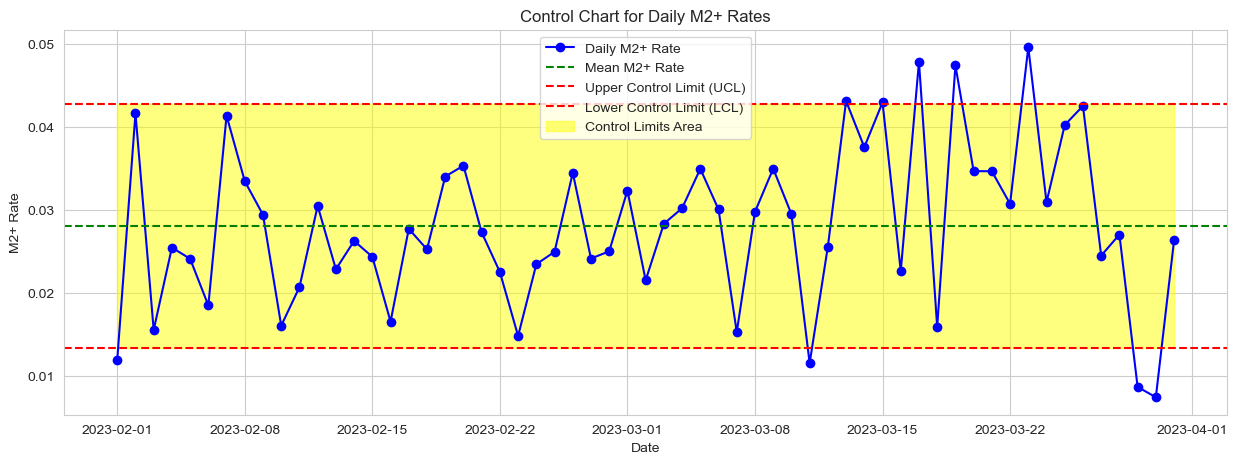

0.34899509351340824

In [207]:
# 计算变异系数
cv = std_m2_rate / mean_m2_rate

# 导入绘图库
import matplotlib.pyplot as plt

# 绘制控制图
plt.figure(figsize=(15, 5))
plt.plot(daily_data['LOAN_DATE'], daily_data['M2_rate'], marker='o', linestyle='-', color='blue', label='Daily M2+ Rate')
plt.axhline(mean_m2_rate, color='green', linestyle='--', label='Mean M2+ Rate')
plt.axhline(UCL, color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(LCL, color='red', linestyle='--', label='Lower Control Limit (LCL)')
plt.fill_between(daily_data['LOAN_DATE'], LCL, UCL, color='yellow', alpha=0.5, label='Control Limits Area')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.title('Control Chart for Daily M2+ Rates')
plt.legend()
plt.grid(True)
plt.show()

# 输出变异系数
cv

### Risk Exposure Analysis

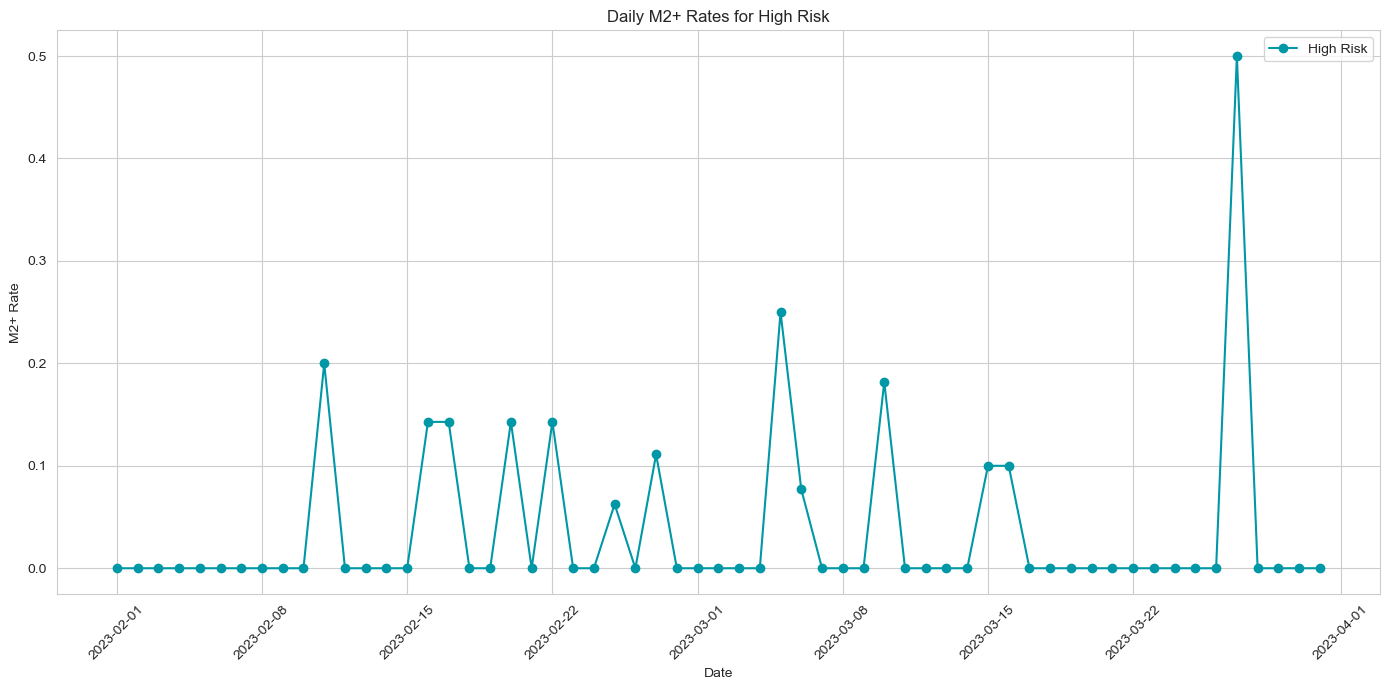

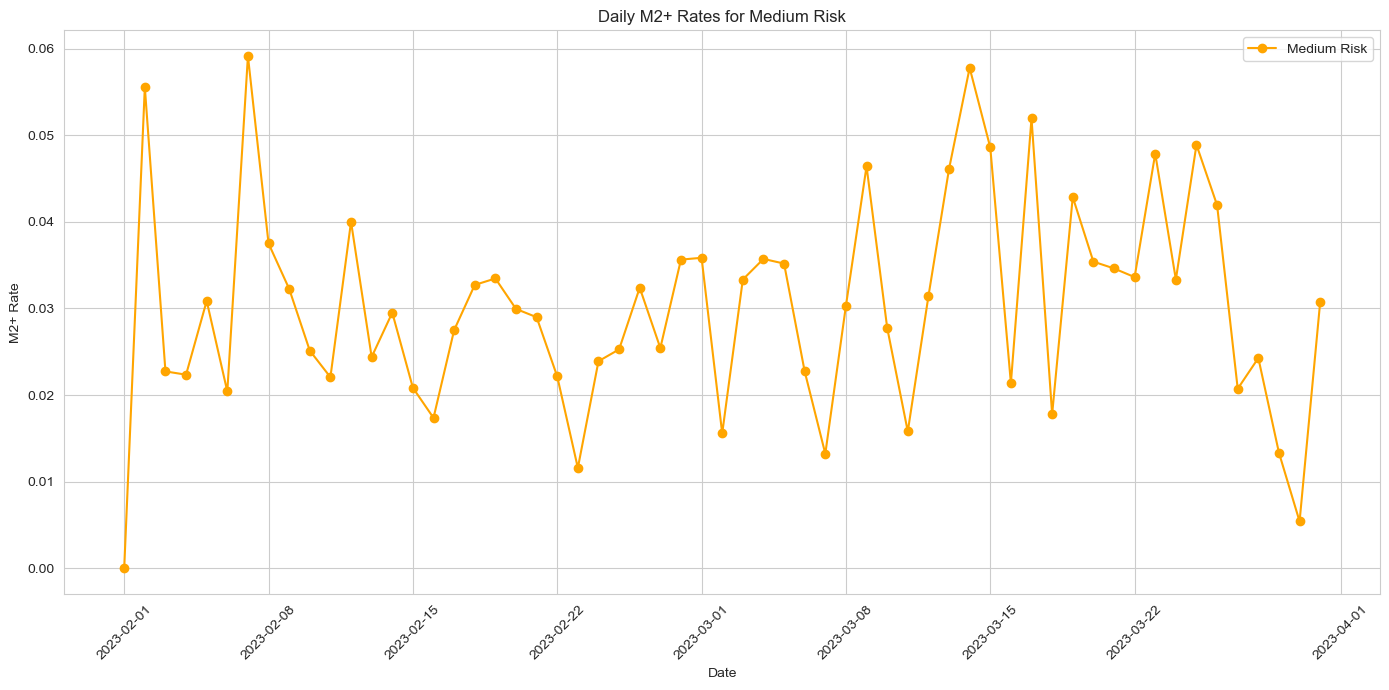

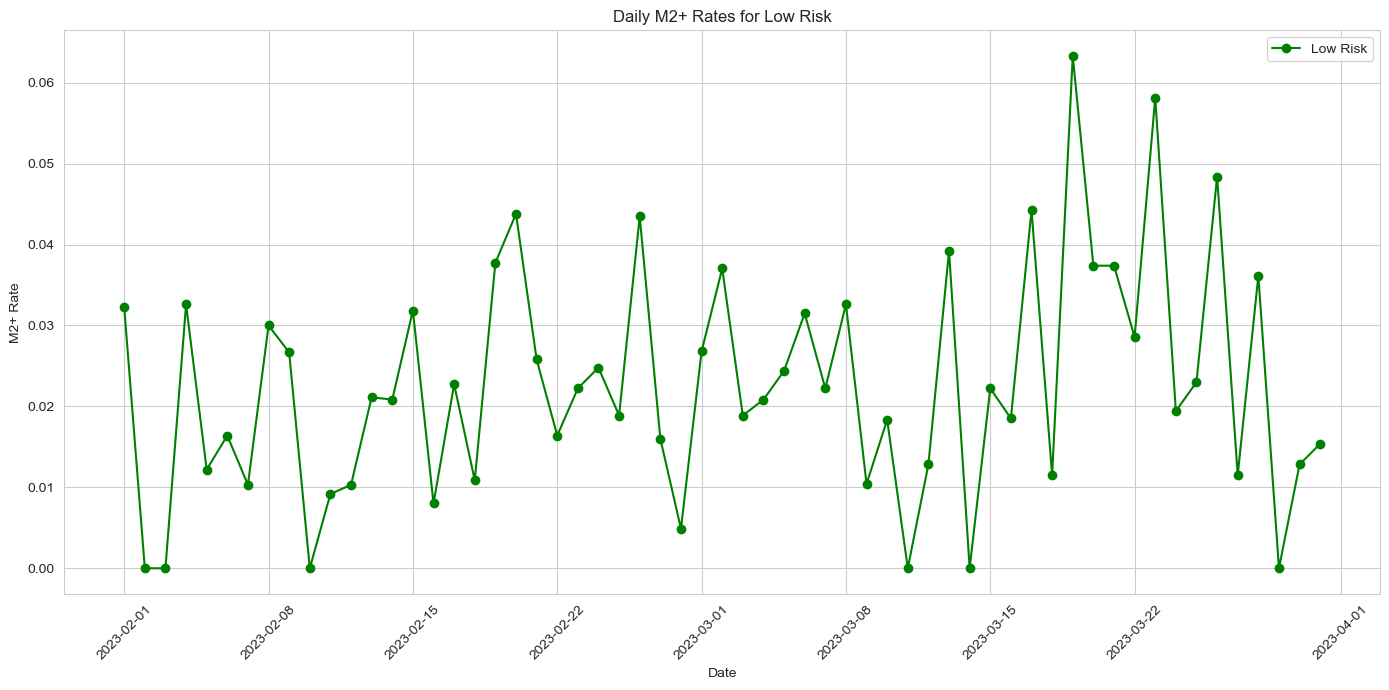

LOAN_DATE
2023-03-27    0.5
2023-03-28    0.0
2023-03-29    0.0
2023-03-30    0.0
2023-03-31    0.0
Name: High Risk, dtype: float64

In [208]:
# Load the data from the Excel file
file_path = "/Users/gengruisi/Downloads/data.xlsx"
# Load the data from the Excel file
df = pd.read_excel(file_path)

# Convert 'LOAN_DATE' to datetime and set as index
df['LOAN_DATE'] = pd.to_datetime(df['LOAN_DATE']).dt.date
df.set_index('LOAN_DATE', inplace=True)

# Sort the DataFrame by the index
df.sort_index(inplace=True)

# Define risk categories based on 'EXT1_INCOME_FORECAST'
df['Risk_Category'] = pd.cut(df['EXT1_INCOME_FORECAST'],
                              bins=[0, 2, 3, 5],
                              labels=['High Risk', 'Medium Risk', 'Low Risk'],
                              right=False)

# Calculate daily M2+ rates for each risk category
m2_rate_daily_by_risk = df.groupby(['Risk_Category', df.index])['M2_FLG'].mean().unstack(level=0)

# Plotting the M2+ rates by day for each risk category
plt.figure(figsize=(14, 7))
m2_rate_daily_by_risk['High Risk'].plot(kind='line', marker='o', label='High Risk')
plt.title('Daily M2+ Rates for High Risk')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(14, 7))
m2_rate_daily_by_risk['Medium Risk'].plot(kind='line', marker='o', label='Medium Risk', color='orange')
plt.title('Daily M2+ Rates for Medium Risk')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(14, 7))
m2_rate_daily_by_risk['Low Risk'].plot(kind='line', marker='o', label='Low Risk', color='green')
plt.title('Daily M2+ Rates for Low Risk')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

# Output the last few entries of daily M2+ rate for High Risk category for further analysis
m2_rate_daily_by_risk['High Risk'].tail()


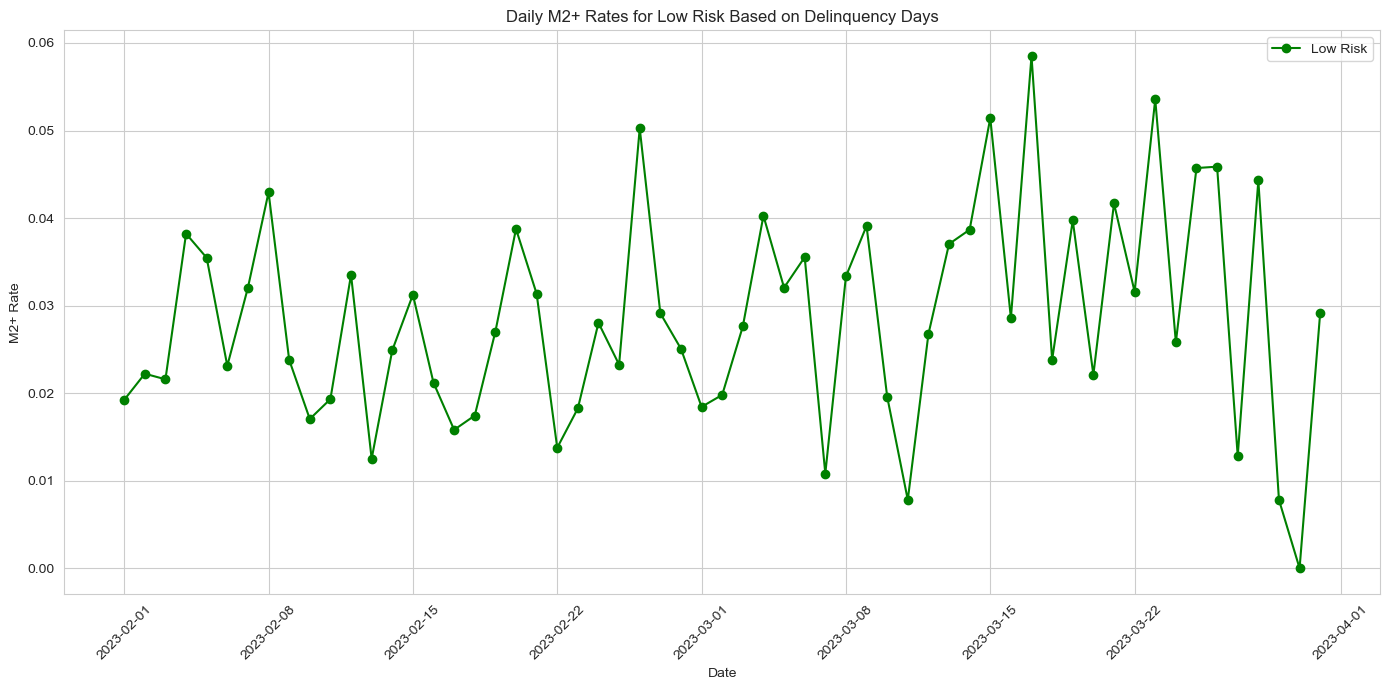

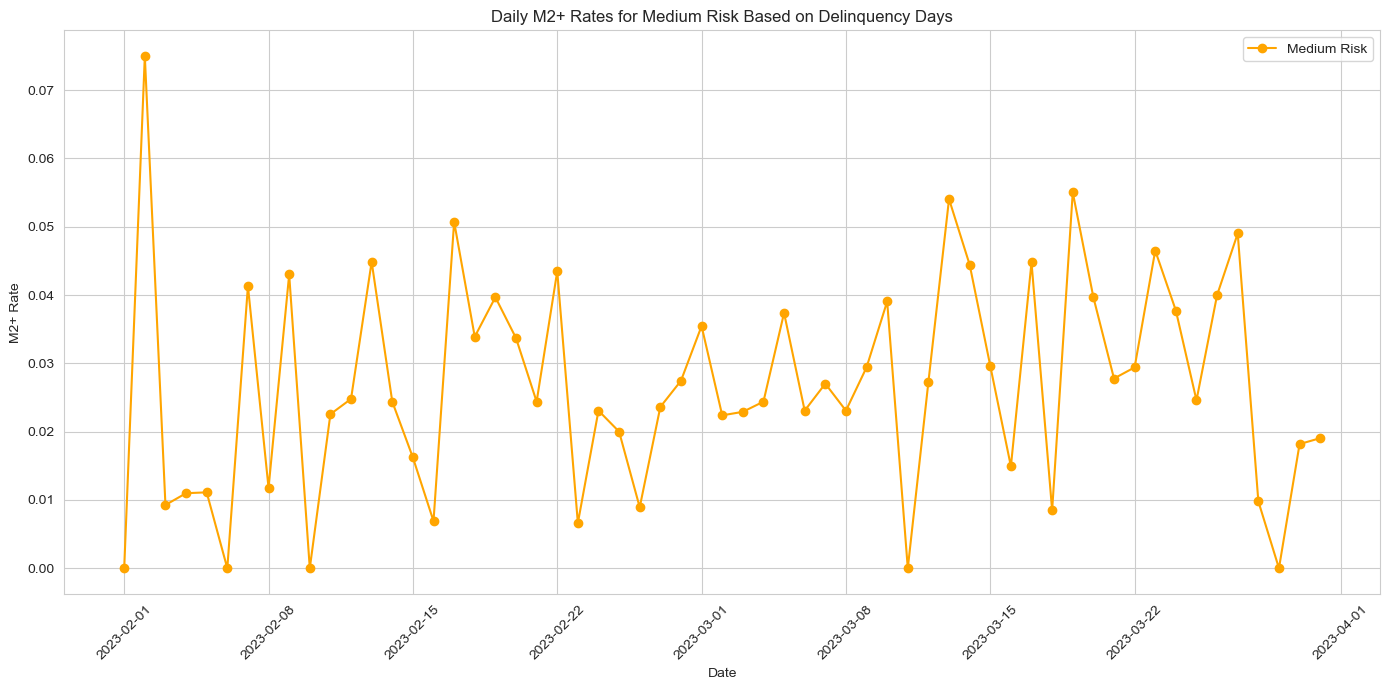

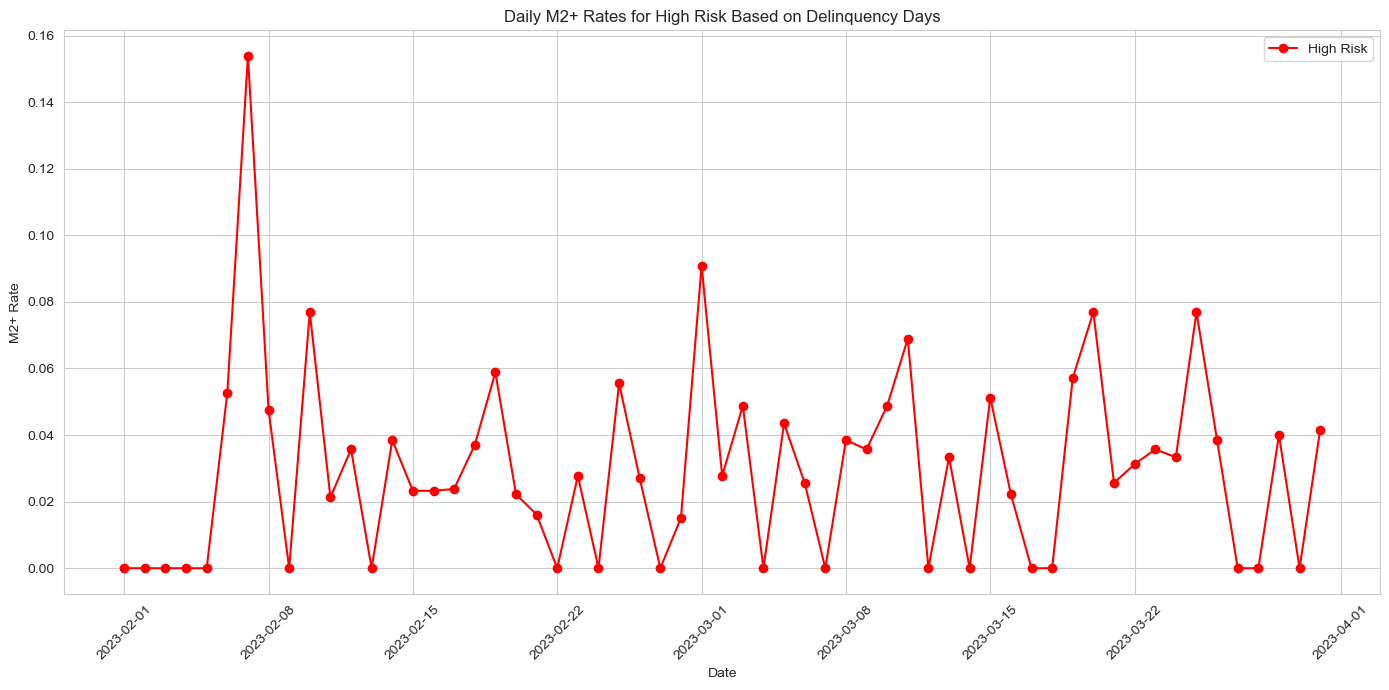

Risk_Category,Low Risk,Medium Risk,High Risk
LOAN_DATE,,,
2023-03-27,0.012821,0.049020,0.000000
2023-03-28,0.044304,0.009804,0.000000
2023-03-29,0.007812,0.000000,0.040000
2023-03-30,0.000000,0.018182,0.000000
2023-03-31,0.029197,0.019048,0.041667


In [173]:
# First, we need to reclassify the risk based on 'PRODUCT_MAX_DLQ_DAYS_3M'
# We will then plot the M2+ rates for each of the new risk categories.

# Define new risk categories based on 'PRODUCT_MAX_DLQ_DAYS_3M'
def assign_risk_category_by_dlq_days(row):
    if row['PRODUCT_MAX_DLQ_DAYS_3M'] == 0:
        return 'Low Risk'
    elif row['PRODUCT_MAX_DLQ_DAYS_3M'] == 1:
        return 'Medium Risk'
    elif row['PRODUCT_MAX_DLQ_DAYS_3M'] >= 2:
        return 'High Risk'
    else:
        return 'Undefined'

# Apply the function to the dataframe to create a new column 'Risk_Category'
df['Risk_Category'] = df.apply(assign_risk_category_by_dlq_days, axis=1)

# Calculate daily M2+ rates for each new risk category
m2_rate_daily_by_risk_dlq = df.groupby(['Risk_Category', df.index])['M2_FLG'].mean().unstack(level=0)

# Plotting the M2+ rates by day for each new risk category
plt.figure(figsize=(14, 7))
m2_rate_daily_by_risk_dlq['Low Risk'].plot(kind='line', marker='o', label='Low Risk', color='green')
plt.title('Daily M2+ Rates for Low Risk Based on Delinquency Days')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(14, 7))
m2_rate_daily_by_risk_dlq['Medium Risk'].plot(kind='line', marker='o', label='Medium Risk', color='orange')
plt.title('Daily M2+ Rates for Medium Risk Based on Delinquency Days')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

plt.figure(figsize=(14, 7))
m2_rate_daily_by_risk_dlq['High Risk'].plot(kind='line', marker='o', label='High Risk', color='red')
plt.title('Daily M2+ Rates for High Risk Based on Delinquency Days')
plt.xlabel('Date')
plt.ylabel('M2+ Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

# Output the last few entries of daily M2+ rate for each category for further analysis
m2_rate_daily_by_risk_dlq[['Low Risk', 'Medium Risk', 'High Risk']].tail()


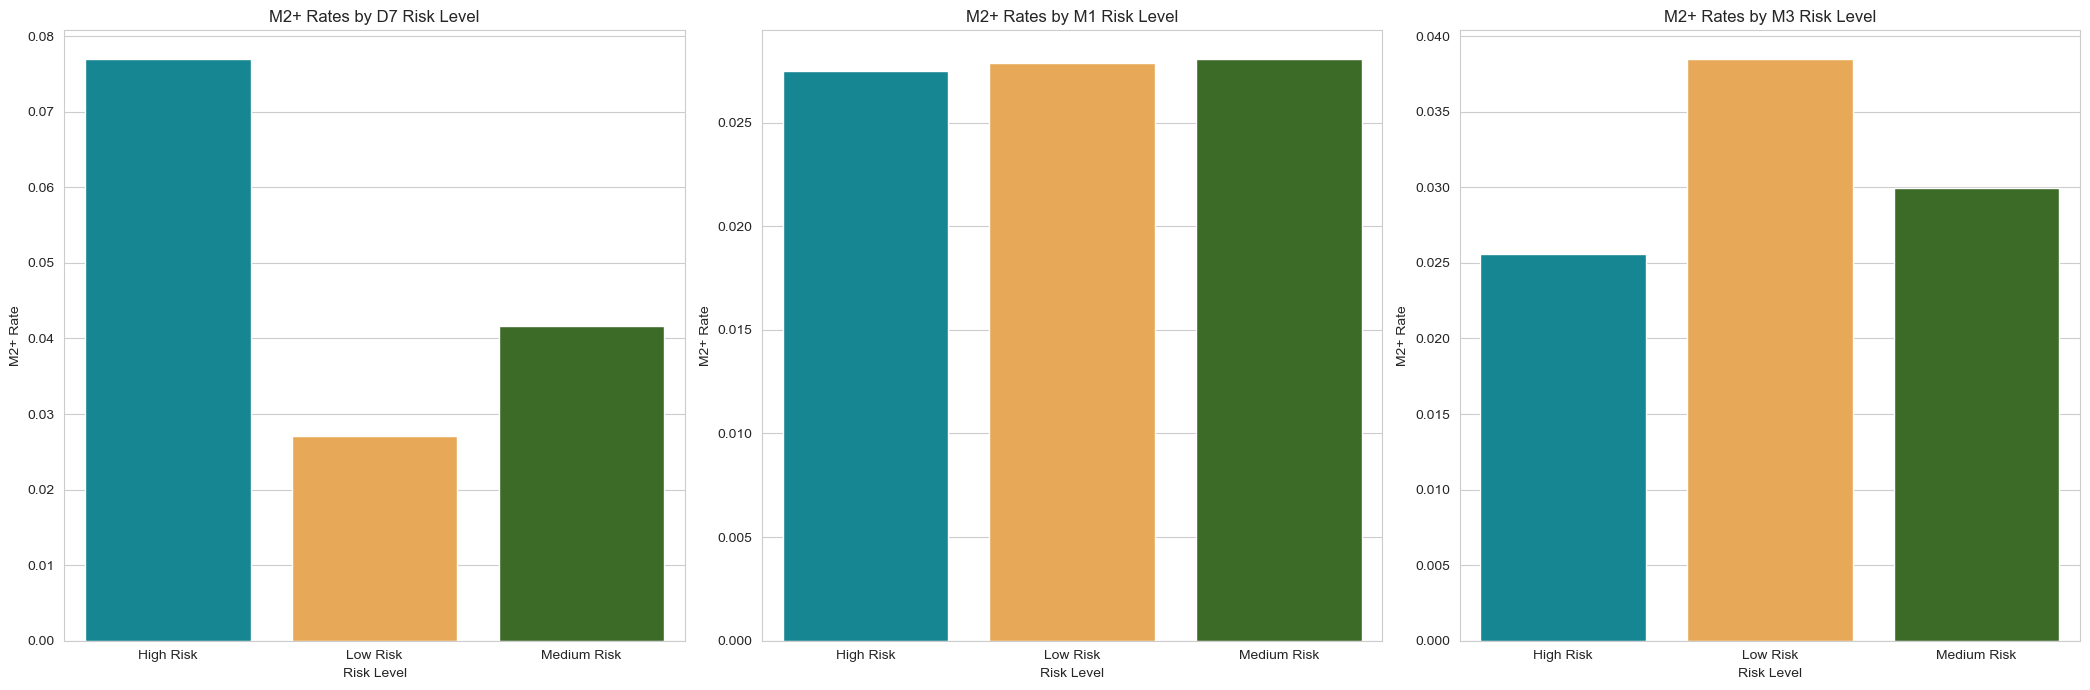

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the data

# Define a function to categorize the risk based on the application counts
def categorize_risk(app_count):
    if app_count <= 4:
        return 'Low Risk'
    elif app_count <= 9:
        return 'Medium Risk'
    else:
        return 'High Risk'

# Exclude the impossible value -1 and categorize risk for each time period
df = df[df['EXT2_D7_NBANK_ORGNUM'] >= 0]
df['Risk_Level_D7'] = df['EXT2_D7_NBANK_ORGNUM'].apply(categorize_risk)
df['Risk_Level_M1'] = df['EXT2_M1_NBANK_ORGNUM'].apply(categorize_risk)
df['Risk_Level_M3'] = df['EXT2_M3_NBANK_ORGNUM'].apply(categorize_risk)

# Define the colors for the bar plots
colors = ['#0097a7', '#ffab40', '#38761d']

# Plot the M2+ rates for each risk level and each time period
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

for i, (period, ax) in enumerate(zip(['D7', 'M1', 'M3'], axes)):
    # Calculate the M2+ rate for each risk category
    m2_rate_by_risk = df.groupby(f'Risk_Level_{period}')['M2_FLG'].mean()
    
    # Create a bar plot with the specified colors
    sns.barplot(x=m2_rate_by_risk.index, y=m2_rate_by_risk.values, ax=ax, palette=colors)
    ax.set_title(f'M2+ Rates by {period} Risk Level')
    ax.set_xlabel('Risk Level')
    ax.set_ylabel('M2+ Rate')

plt.tight_layout()
plt.show()
